In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("/Users/Sophie/git/MCcubed/")
import MCcubed as mc3   # Add path to mc3 if necessary
plt.ion()

import pandas as pd
df_ground = pd.read_csv("../data/k2_28b/K2_data_k2_28b_for_plotting_ground.csv",sep=",",header=0)
df_k2 = pd.read_csv("../data/k2_28b/K2_data_k2_28b_for_plotting_k2.csv",sep=",",header=0)

df_ground_k2_100b = pd.read_csv("../data/k2_100b/K2_data_k2_100b_for_plotting_ground.csv",sep=",",header=0)
df_k2_k2_100b = pd.read_csv("../data/k2_100b/K2_data_k2_100b_for_plotting_k2.csv",sep=",",header=0)

df_ground_k2_104b = pd.read_csv("../data/k2_104b/K2_data_k2_104b_for_plotting_ground.csv",sep=",",header=0)
df_k2_k2_104b = pd.read_csv("../data/k2_104b/K2_data_k2_104b_for_plotting_k2.csv",sep=",",header=0)

In [50]:
# ---------- Graphics ------------
# matplotlib
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=0.5,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)

%matplotlib inline
#%matplotlib osx
#%matplotlib nbagg
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
#rcParams["text.usetex"] = True #uncomment to use tex. Slow, but pretty
#rcParams["font.weight"] = 900

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=4
rcParams['xtick.minor.width']=0.5
rcParams['xtick.minor.size']=2
rcParams['xtick.direction'] = "in"
rcParams['ytick.direction'] = "in"
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=4
rcParams['ytick.minor.width']=0.5
rcParams['ytick.minor.size']=2

In [51]:
from __future__ import print_function
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=0.5,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")

import getpass
# Remove gks paths (not needed for anyone else)
if getpass.getuser()=="gks":
    try:
        sys.path.remove("/Users/gks/Dropbox/mypylib/notebooks/GIT/transitMCMC/src")
        sys.path.remove("/Users/gks/Dropbox/mypylib")
    except Exception as e:
        print(e)
        print("Paths already removed")

In [52]:
from priors import PriorSet, UP, NP, JP
import trf
import pyde
import mcmc_utils
from exotk.utils.likelihood import ll_normal_ev_py, ll_normal_es, ll_normal_ev
import batman
import math
import epicblsmulti
import k2help
import utils

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/Sophie/git/MCcubed/")
#sys.path.append("/Users/gks/programs/MCcubed2/MCcubed") # Add path to mc3 if necessary
import allanvariancemc_modified 
import pandas as pd

In [54]:
#creating allan variance plot
avmc = allanvariancemc_modified.AllanVarianceMC()
avmc.compute_noise(TF.residual)
fig, ax = avmc.plot()

NameError: name 'TF' is not defined

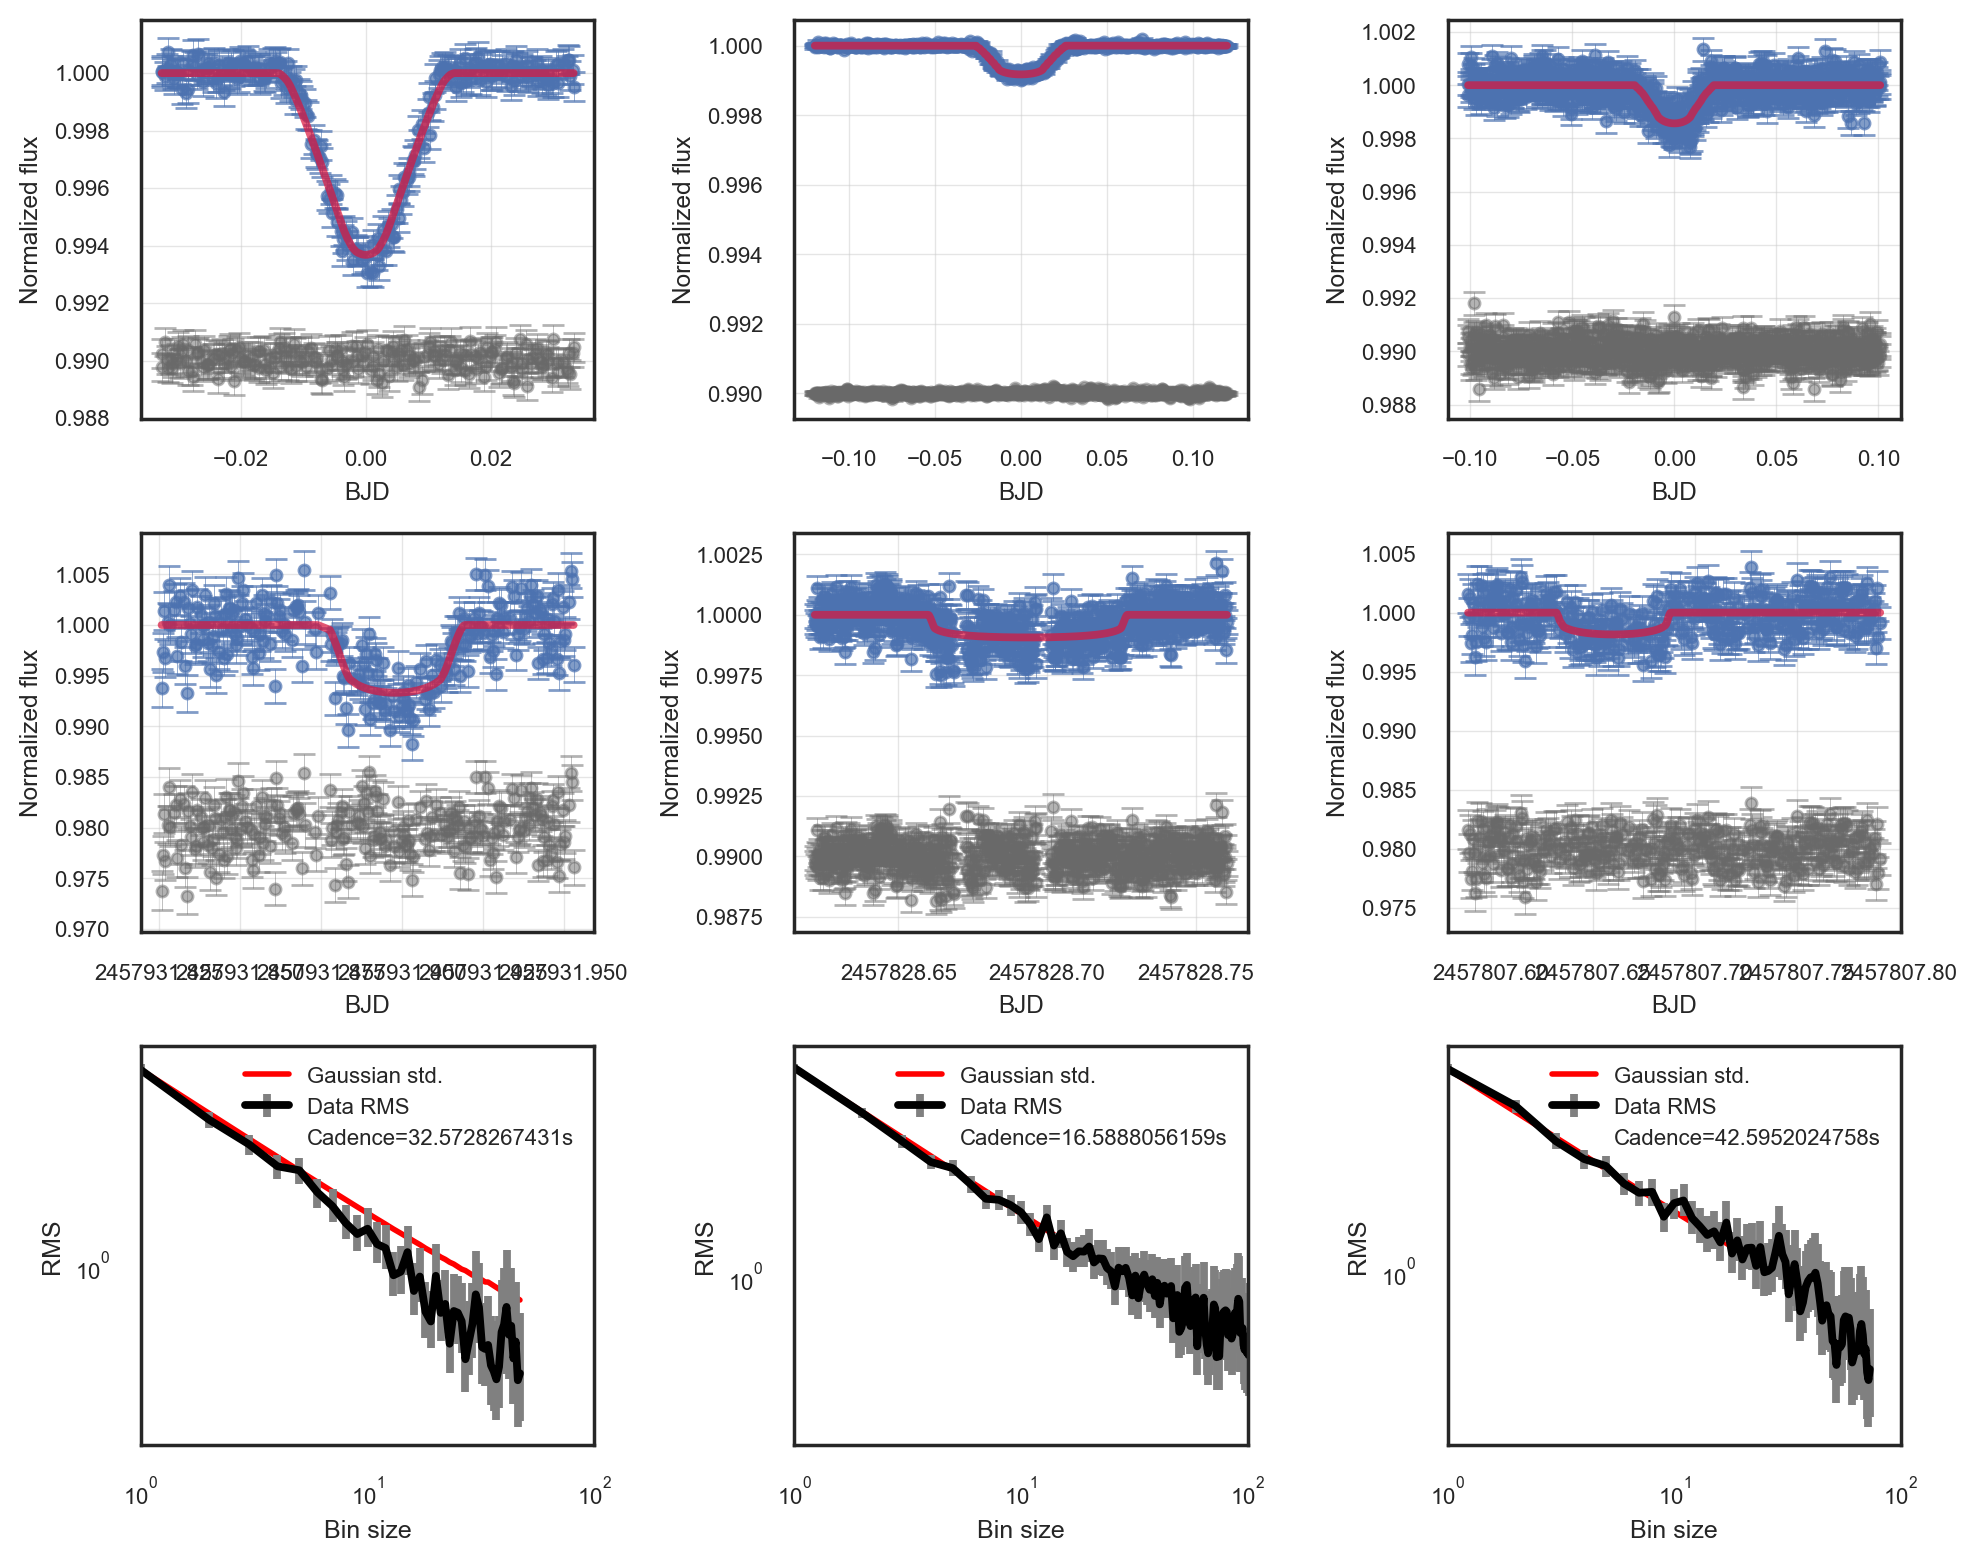

In [55]:
import plot_transits
# create a 9 panel plot
fig, axx = plt.subplots(nrows=3,ncols=3,figsize=(10,8))
(ax,bx,cx),(dx,ex,fx),(gx,hx,ix) = axx


#k2-28b
plot_transits.plot_transit_with_model(df_k2['phase_fold_time_k2'],
                        df_k2['phase_fold_scaled_flux_k2'],
                        df_k2['scaled_error_k2'],
                        yresidual=df_k2['yresidual_k2'],
                        xmodel=df_k2['xmodel_k2'],
                        ymodel=df_k2['ymodel_k2'],ax=ax)
plot_transits.plot_transit_with_model(df_ground['time_ground'],
                        df_ground['scaled_flux_ground'],
                        df_ground['scaled_error_ground'],
                        yresidual=df_ground['yresidual_ground'],
                        xmodel=df_ground['xmodel_ground'],
                        ymodel=df_ground['ymodel_ground'],
                        offset=0.98,ax=dx)

# (Sinusoidal) time-correlated signal:
red = np.array(df_ground['yresidual_ground'])
# Generate residuals signal:
N = len(red)
# White-noise signal:
white = np.random.normal(0, 5, N)
# Compute the residuals rms-vs-binsize:
maxbins = N/5
rms, rmslo, rmshi, stderr, binsz = mc3.rednoise.binrms(white+red, maxbins)
gx.errorbar(binsz, rms, yerr=[rmslo, rmshi], fmt="k-", ecolor='0.5', capsize=0, label="Data RMS",zorder=2)
gx.loglog(binsz, stderr, color='red', ls='-', lw=2, label="Gaussian std.",zorder=1)
gx.set_xlim(1,100)
gx.scatter(10,1,label='Cadence=32.5728267431s',color='white',s=0.001,zorder=3) #precision 30mins bin, 1 min
handles,labels = gx.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]
gx.legend(handles,labels,loc="upper right")
gx.set_xlabel("Bin size", fontsize=9)
gx.set_ylabel("RMS", fontsize=9)




#k2-104b
plot_transits.plot_transit_with_model(df_k2_k2_100b['phase_fold_time_k2'],
                        df_k2_k2_100b['phase_fold_scaled_flux_k2'],
                        df_k2_k2_100b['scaled_error_k2'],
                        yresidual=df_k2_k2_100b['yresidual_k2'],
                        xmodel=df_k2_k2_100b['xmodel_k2'],
                        ymodel=df_k2_k2_100b['ymodel_k2'],ax=bx)
plot_transits.plot_transit_with_model(df_ground_k2_100b['time_ground'],
                        df_ground_k2_100b['scaled_flux_ground'],
                        df_ground_k2_100b['scaled_error_ground'],
                        yresidual=df_ground_k2_100b['yresidual_ground'],
                        xmodel=df_ground_k2_100b['xmodel_ground'],
                        ymodel=df_ground_k2_100b['ymodel_ground'],
                        offset=0.99,ax=ex)
# (Sinusoidal) time-correlated signal:
red_100b = np.array(df_ground_k2_100b['yresidual_ground'])
# Generate residuals signal:
N_100b = len(red_100b)
# White-noise signal:
white_100b = np.random.normal(0, 5, N_100b)
# Compute the residuals rms-vs-binsize:
maxbins_100b = N_100b/5
rms_100b, rmslo_100b, rmshi_100b, stderr_100b, binsz_100b = mc3.rednoise.binrms(white_100b+red_100b, maxbins_100b)
hx.errorbar(binsz_100b, rms_100b, yerr=[rmslo_100b, rmshi_100b], fmt="k-", ecolor='0.5', capsize=0, label="Data RMS",zorder=2)
hx.loglog(binsz_100b, stderr_100b, color='red', ls='-', lw=2, label="Gaussian std.",zorder=1)
hx.set_xlim(1,100)
hx.scatter(10,1,label='Cadence=16.5888056159s',color='white',s=0.001,zorder=3)
handles_100b,labels_100b = hx.get_legend_handles_labels()
handles_100b = [handles_100b[0], handles_100b[2], handles_100b[1]]
labels_100b = [labels_100b[0], labels_100b[2], labels_100b[1]]
hx.legend(handles_100b,labels_100b,loc="upper right")
hx.set_xlabel("Bin size", fontsize=9)
hx.set_ylabel("RMS", fontsize=9)


#k2-104b
plot_transits.plot_transit_with_model(df_k2_k2_104b['phase_fold_time_k2'],
                        df_k2_k2_104b['phase_fold_scaled_flux_k2'],
                        df_k2_k2_104b['scaled_error_k2'],
                        yresidual=df_k2_k2_104b['yresidual_k2'],
                        xmodel=df_k2_k2_104b['xmodel_k2'],
                        ymodel=df_k2_k2_104b['ymodel_k2'],ax=cx)
plot_transits.plot_transit_with_model(df_ground_k2_104b['time_ground'],
                        df_ground_k2_104b['scaled_flux_ground'],
                        df_ground_k2_104b['scaled_error_ground'],
                        yresidual=df_ground_k2_104b['yresidual_ground'],
                        xmodel=df_ground_k2_104b['xmodel_ground'],
                        ymodel=df_ground_k2_104b['ymodel_ground'],
                        offset=0.98,ax=fx)
# (Sinusoidal) time-correlated signal:
red_104b = np.array(df_ground_k2_104b['yresidual_ground'])
# Generate residuals signal:
N_104b = len(red_104b)
# White-noise signal:
white_104b = np.random.normal(0, 5, N_104b)
# Compute the residuals rms-vs-binsize:
maxbins_104b = N_104b/5
rms_104b, rmslo_104b, rmshi_104b, stderr_104b, binsz_104b = mc3.rednoise.binrms(white_104b+red_104b, maxbins_104b)
ix.errorbar(binsz_104b, rms_104b, yerr=[rmslo_104b, rmshi_104b], fmt="k-", ecolor='0.5', capsize=0, label="Data RMS",zorder=2)
ix.loglog(binsz_104b, stderr_104b, color='red', ls='-', lw=2, label="Gaussian std.",zorder=1)
ix.set_xlim(1,100)
ix.scatter(10,1,label='Cadence=42.5952024758s',color='white',s=0.001,zorder=3)
handles_104b,labels_104b = ix.get_legend_handles_labels()
handles_104b = [handles_104b[0], handles_104b[2], handles_104b[1]]
labels_104b = [labels_104b[0], labels_104b[2], labels_104b[1]]
ix.legend(handles_104b,labels_104b,loc="upper right")
ix.set_xlabel("Bin size", fontsize=9)
ix.set_ylabel("RMS", fontsize=9)


plt.tight_layout()
plt.savefig('../data/9_panel_plot.pdf',format='pdf')